In [1]:
# Imports
%matplotlib inline

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns

In [10]:
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

def exponentiated_L1(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'minkowski', p=1.)
    return np.exp(sq_norm)

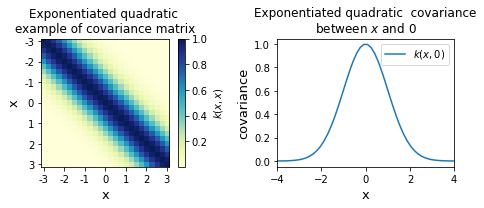

In [5]:
# Illustrate covariance matrix and function

# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Sigma = exponentiated_quadratic(X, X)
# Plot covariance matrix
im = ax1.imshow(Sigma, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$', fontsize=10)
ax1.set_title((
    'Exponentiated quadratic \n'
    'example of covariance matrix'))
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('x', fontsize=13)
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.grid(False)

# Show covariance with X=0
xlim = (-4, 4)
X = np.expand_dims(np.linspace(*xlim, num=50), 1)
zero = np.array([[0]])
Sigma0 = exponentiated_quadratic(X, zero)
# Make the plots
ax2.plot(X[:,0], Sigma0[:,0], label='$k(x,0)$')
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('covariance', fontsize=13)
ax2.set_title((
    'Exponentiated quadratic  covariance\n'
    'between $x$ and $0$'))
# ax2.set_ylim([0, 1.1])
ax2.set_xlim(*xlim)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()
#

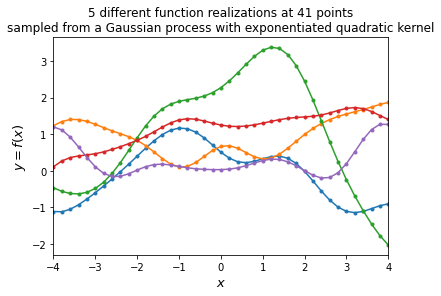

In [9]:
# Sample from the Gaussian process distribution
nb_of_samples = 41  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
#print(X)
Sigma = exponentiated_quadratic(X, X)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Sigma, 
    size=number_of_functions)

plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()
#

In [ ]:
# Sample from the Gaussian process distribution
nb_of_samples = 41  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
#print(X)
Sigma = exponentiated_quadratic(X, X)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Sigma, 
    size=number_of_functions)

plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()
#

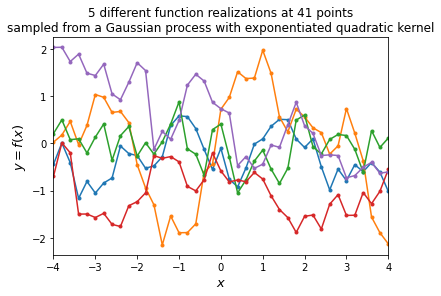

In [46]:
# Sample from the L1
nb_of_samples = 41  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
#print(X)
Sigma = exponentiated_L1(X, X)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Sigma, 
    size=number_of_functions)

plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()

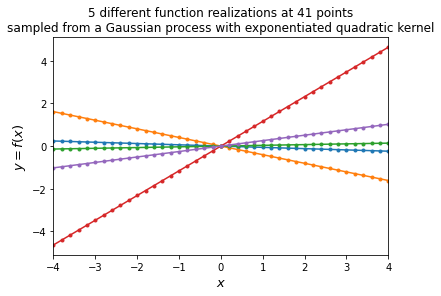

In [47]:
def exponentiated_cus(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    #sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'minkowski', p=1.)
    #print(xa,xb)
    return np.array([ np.array([x1*x2 for x1 in xb ]) for x2 in xa])

# Sample from the Gaussian process distribution
nb_of_samples = 41  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
#print(X)
Sigma = exponentiated_cus(X, X)  # Kernel of data points
Sigma = Sigma.reshape((41,41))
# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples), cov=Sigma, 
    size=number_of_functions)

plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 41 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()

In [16]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    sigma11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    sigma12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(sigma11, sigma12, assume_a='pos').T
    # Compute posterior mean
    mu2 = solved @ y1
    # Compute the posterior covariance
    sigma22 = kernel_func(X2, X2)
    sigma2 = sigma22 - (solved @ sigma12)
    return mu2, sigma2  # mean, covariance

In [19]:
# Compute the posterior mean and covariance

# Define the true function that we want to regress on
f_sin = lambda x: (np.sin(x)).flatten()

n1 = 8  # Number of points to condition on (training points)
n2 = 75  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Compute posterior mean and covariance
mu2, sigma2 = GP(X1, y1, X2, exponentiated_quadratic)
# Compute the standard deviation at the test points to be plotted
std2 = np.sqrt(np.diag(sigma2))
#print(std2)
# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=sigma2, size=ny)

[1.00000000e+00 1.00000000e+00 9.99999999e-01 9.99999995e-01
 9.99999981e-01 9.99999927e-01 9.99999737e-01 9.99999095e-01
 9.99997047e-01 9.99990869e-01 9.99973232e-01 9.99925639e-01
 9.99804281e-01 9.99512077e-01 9.98848173e-01 9.97425838e-01
 9.94554580e-01 9.89096173e-01 9.79327627e-01 9.62870885e-01
 9.36765466e-01 8.97750726e-01 8.42781090e-01 7.69727504e-01
 6.78140987e-01 5.69894019e-01 4.49494518e-01 3.23901278e-01
 2.01763649e-01 9.21502859e-02 2.99041916e-03 6.04223506e-02
 9.64706813e-02 1.07481109e-01 9.90934200e-02 7.88672142e-02
 5.45050374e-02 3.22049646e-02 1.56159157e-02 5.65719865e-03
 1.15339815e-03 5.14112661e-05 1.93289515e-05 1.65490535e-04
 9.26426865e-05 9.09764401e-07 3.17815954e-06 2.12419499e-04
 1.31825542e-03 3.86578273e-03 7.71686472e-03 1.17573491e-02
 1.41643466e-02 1.32324988e-02 8.47503539e-03 1.54003676e-03
 3.49401774e-03 6.63948794e-04 1.65853309e-02 5.37373807e-02
 1.13685244e-01 1.95821288e-01 2.95992232e-01 4.07298395e-01
 5.21472076e-01 6.304354

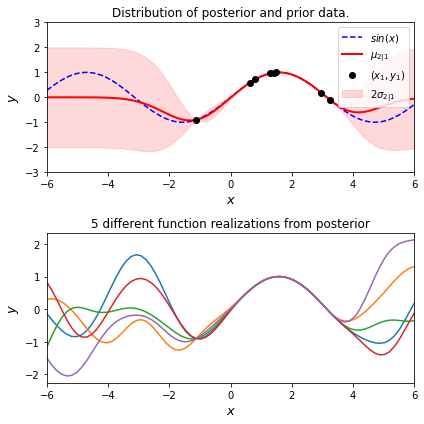

In [21]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, mu2-2*std2, mu2+2*std2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#

In [22]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, sigma_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    # Kernel of the noisy observations
    sigma11 = kernel_func(X1, X1) + ((sigma_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    sigma12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(sigma11, sigma12, assume_a='pos').T
    # Compute posterior mean
    mu2 = solved @ y1
    # Compute the posterior covariance
    sigma22 = kernel_func(X2, X2)
    sigma2 = sigma22 - (solved @ sigma12)
    return mu2, sigma2  # mean, covariance

In [30]:

# Compute the posterior mean and covariance

sigma_noise = 0.1 # The standard deviation of the noise
# Add noise kernel to the samples we sampled previously
y1 = f_sin(X1)
y1 = y1 + ((sigma_noise ** 2) * np.random.randn(n1))

# Compute posterior mean and covariance
mu2, sigma2 = GP_noise(X1, y1, X2, exponentiated_quadratic, sigma_noise)
# Compute the standard deviation at the test points to be plotted
std2 = np.sqrt(np.diag(sigma2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=sigma2, size=ny)

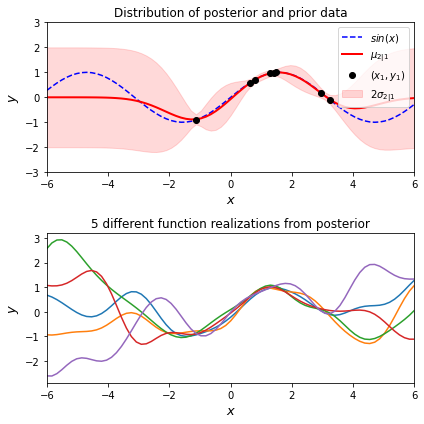

In [31]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, mu2-2*std2, mu2+2*std2, color='red', 
                 alpha=0.15, label='$2\sigma_{2|1}$')
ax1.plot(X2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#